In [17]:
from data_generator import generate_losangles, generate_edges
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tail_scratch_nn import DNN
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [18]:
quadrants = [0,1,2,3]
data_train = []
data_test = []
amount_train = 500 # Amount of data per class
amount_test = 100

In [19]:
for quadrant in quadrants:
    data_train.extend(generate_losangles(amount_train,quadrant))
    data_test.extend(generate_losangles(amount_test,quadrant))
    data_train.extend(generate_edges(amount_train,quadrant))
    data_test.extend(generate_edges(amount_test,quadrant))
    

In [20]:
data_train = np.array(data_train)
data_test = np.array(data_test)

In [21]:
X_train = data_train[:,[0,1]]
y_train = data_train[:,2]
x_test = data_test[:,[0,1]]
y_test = data_test[:,2]

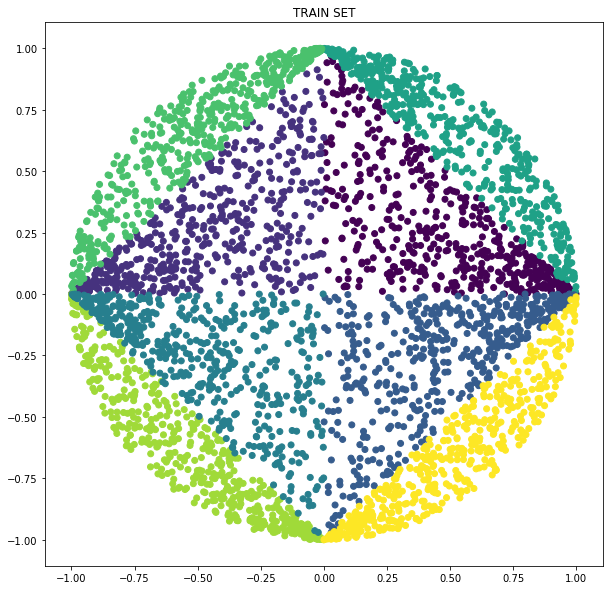

In [22]:
plt.figure(figsize=(10,10))
plt.title('TRAIN SET')
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

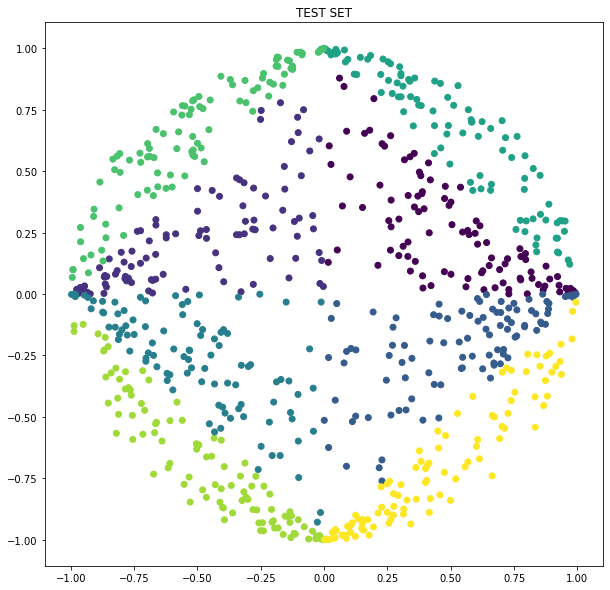

In [23]:
plt.figure(figsize=(10,10))
plt.title('TEST SET')
plt.scatter(x_test[:,0], x_test[:,1], c = y_test)
plt.show()

In [24]:
onehot = OneHotEncoder()

In [25]:
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = onehot.fit_transform(y_test.reshape(-1,1)).toarray()

***

In [26]:
neural_net = DNN()

In [27]:
neural_net.fit(X_train.T, y_train.T, x_test.T, y_test.T, hidden="relu", output="softmax")

EPOCH 0 Train cost : 2.07944066 | val cost : 2.07944059
EPOCH 10 Train cost : 2.07332728 | val cost : 2.07323356
EPOCH 20 Train cost : 2.01291243 | val cost : 2.01214627
EPOCH 30 Train cost : 1.83814924 | val cost : 1.83604218
EPOCH 40 Train cost : 1.57672359 | val cost : 1.56974267
EPOCH 50 Train cost : 1.35223045 | val cost : 1.34122743
EPOCH 60 Train cost : 1.134031 | val cost : 1.11620274
EPOCH 70 Train cost : 0.92512712 | val cost : 0.89703766
EPOCH 80 Train cost : 0.73591098 | val cost : 0.70688735
EPOCH 90 Train cost : 0.58062492 | val cost : 0.55212292
EPOCH 100 Train cost : 0.46926152 | val cost : 0.44530667
EPOCH 110 Train cost : 0.38580085 | val cost : 0.36197595
EPOCH 120 Train cost : 0.32458744 | val cost : 0.30428571
EPOCH 130 Train cost : 0.2792644 | val cost : 0.26045622
EPOCH 140 Train cost : 0.24851124 | val cost : 0.22889991
EPOCH 150 Train cost : 0.22313019 | val cost : 0.20658462
EPOCH 160 Train cost : 0.20280376 | val cost : 0.18593875
EPOCH 170 Train cost : 0.187

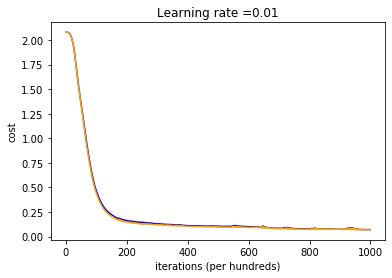

In [28]:
neural_net.train([2, 10, 10, 8], learning_rate=0.01, iterations=1000, adam_optimizer=True)

In [29]:
y_pred = neural_net.predict(x_test.T).T

In [30]:
np.argmax(y_pred, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,

In [31]:
np.argmax(y_test, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,

In [32]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

0.9725